# Genre 轉為 Matrix

In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

In [3]:
# 讀取固定的類別順序
genres = read_json('../orderdListGenres.json')
print(len(genres), genres)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [4]:
# 讀取電影所屬的分類
genresMat = read_json('../genresMat.json')
len(genresMat)

97

## genresMat轉成csv

In [6]:
li = []
for key, v in genresMat.items():
    li.append([key] + v)

In [7]:
df=pd.DataFrame(li, columns = ['movie'] + genres)
df = df.sort_values(by = 'movie')
df

,movie,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
72,47metersdown,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
29,adogsjourneymovie,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,aftermathmovie,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
7,aftermovie,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
38,alitamovie,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,usmovie,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
18,whatmenwant,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83,wonderparkmovie,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,xmenmovies,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
# save on hot encoded genre
df.to_csv('../genresMat.csv', index = False)

# Extract Poster

## Copy Poster to Poster/

In [6]:
PATH = '../Profiles/'
POSTER = './Poster/'
newPath(POSTER)

In [7]:
li = []
for folder in os.listdir(PATH):
    print(folder)
    src = PATH + folder + '/poster.jpeg'
    name = folder + '.jpg'
    dst = POSTER + name
    shutil.copy(src, dst)
    li.append([name] + genresMat[folder])

yesterdaymovie
toystory
arcticmovie
secretlifeofpets
annamovie
overcomermovie
usmovie
lionking
captainmarvelofficial
uglydolls
littlewoodsfilm
lastblackmansf
annabellemovie
scarystoriesmovie
thefarewell
shaftmovie
onceinhollywood
angrybirdsmovie
disneyaladdin
lalloronamovie
breakthroughmovie
goodboysmovie
rocketmanmovie
aftermathmovie
underthesilverlake
fightingwmyfam
blindedbythelightmovie
happydeathdaymovie
longshotmovie
isntitromantic
childsplaymovie
doramovie
spidermanmovie
themustangfilm
httydragon
captivestatemovie
47metersdown
missbalamovie
gloriabellmovie
thekitchenmovie
meninblack
angelhasfallen
apollo11movie
thedeaddontdie
highlifemovie
pomsmovie
brightburnmovie
latenightmovie
everybodyknowsmovie
shazammovie
hustlemovie
gretafilm
wonderparkmovie
coldpursuitmovie
hotelmumbaifilm
alitamovie
glassmovie
taosdfilm
theupsidefilm
triplefrontier
brittanyrunsmov
escaperoom
booksmart
bernadettefilm
aftermovie
xmenmovies
thesunisalsoastar
fivefeetapartfilm
onthebasisofsex
tolkienmovie
b

## Filename to genre matrix dataframe

In [8]:
df=pd.DataFrame(li, columns = ['filename'] + genres).sort_values(by='filename')
df

,filename,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
36,47metersdown.jpg,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
96,adogsjourneymovie.jpg,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23,aftermathmovie.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
64,aftermovie.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
55,alitamovie.jpg,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,usmovie.jpg,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
89,whatmenwant.jpg,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
52,wonderparkmovie.jpg,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,xmenmovies.jpg,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
df.to_csv('./poster2genreMat.csv', index = 0)

# Extract all img and cover in posts

## Copy from Post/ to IGimg/

In [9]:
PATH = '../Posts/'
IG_IMG = './IGimg/'
newPath(IG_IMG)

In [10]:
li = []
for folder in os.listdir(PATH):
    print(folder)
    postList = os.listdir(PATH + folder) # all posts for each account
    length = len(postList)
    i = 0
    for postID in postList:
        postPath = PATH + folder + '/' + postID + '/'
        post = read_json(postPath + 'post.json')
        writeProgress('Progress:', i, length)
        
        if post['media_type'] in [1, 8]:
            for file in os.listdir(postPath):
                if 'img' in file:
                    src = postPath + file
                    dst = IG_IMG + '/'
                    count = len(os.listdir(dst))
                    name = folder + '_' + str(count) + '.jpg'
                    shutil.copy(src, dst + name)
                    li.append([name] + genresMat[folder])
                    
        elif post['media_type'] == 2:
            for file in os.listdir(postPath):
                if 'img' in file:
                    src = postPath + file
                    dst = IG_IMG + '/'
                    count = len(os.listdir(dst))
                    name = folder + '_' + str(count) + '.jpg'
                    shutil.copy(src, dst + name)
                    li.append([name] + genresMat[folder])
                    
        else:
            print('Unknown media_type', post['media_type'])
            
        i += 1

yesterdaymovie
toystory:98.77%
arcticmovie.95%
secretlifeofpets
annamovie99.77%
overcomermovie%
usmovies:99.10%
lionking:99.24%
captainmarvelofficial
uglydolls99.44%
littlewoodsfilm
lastblackmansf%
annabellemovie%
scarystoriesmovie
thefarewell.46%
shaftmovie6.77%
onceinhollywood
angrybirdsmovie
disneyaladdin4%
lalloronamovie%
breakthroughmovie
goodboysmovie3%
rocketmanmovie%
aftermathmovie%
underthesilverlake
fightingwmyfam%
blindedbythelightmovie
happydeathdaymovie
longshotmovie7%
isntitromantic%
childsplaymovie
doramovie98.65%
spidermanmovie%
themustangfilm%
httydragon8.90%
captivestatemovie
47metersdown53%
missbalamovie7%
gloriabellmovie
thekitchenmovie
meninblack8.36%
angelhasfallen%
apollo11movie2%
thedeaddontdie%
highlifemovie2%
pomsmovie96.77%
brightburnmovie
latenightmovie%
everybodyknowsmovie
shazammovie.68%
hustlemovie.10%
gretafilm99.18%
wonderparkmovie
coldpursuitmovie
hotelmumbaifilm
alitamovie8.15%
glassmovie9.44%
taosdfilm98.96%
theupsidefilm0%
triplefrontier%
brittanyru

## Filename to genre matrix dataframe

In [11]:
df=pd.DataFrame(li, columns = ['filename'] + genres).sort_values(by='filename')
df

,filename,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
4215,47metersdown_4215.jpg,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,47metersdown_4216.jpg,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4217,47metersdown_4217.jpg,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4218,47metersdown_4218.jpg,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4219,47metersdown_4219.jpg,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,yesterdaymovie_82.jpg,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
83,yesterdaymovie_83.jpg,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
84,yesterdaymovie_84.jpg,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
85,yesterdaymovie_85.jpg,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
df.to_csv('./filename2genreMat.csv', index = 0)

## Count the number for each genre

In [13]:
df = pd.read_csv('./filename2genreMat.csv')

In [14]:
genreCount = pd.DataFrame(df.sum(axis = 0), columns = ['count'])
genreCount = genreCount.drop('filename')

In [15]:
genreCount = genreCount.sort_values(by = 'count', ascending = True)
genreCount

,count
Western,36
Documentary,120
War,127
Family,237
History,240
Sport,282
Music,350
Biography,654
Romance,739
Crime,935


# Select train and test part

In [10]:
# init 
total = {}
for g in genreCount.index:
    total[g] = 0
print(total)
df = pd.read_csv('./filename2genreMat.csv')
print(df.shape)

{'Action': 0, 'Mystery': 0, 'Music': 0, 'Family': 0, 'Thriller': 0, 'Sci-Fi': 0, 'Fantasy': 0, 'Animation': 0, 'Biography': 0, 'Horror': 0, 'Western': 0, 'Comedy': 0, 'Sport': 0, 'War': 0, 'Drama': 0, 'Crime': 0, 'Adventure': 0, 'History': 0, 'Documentary': 0, 'Romance': 0}
(11248, 21)


In [11]:
from IPython.display import display
trainingset = pd.DataFrame()
testingset = pd.DataFrame()
for g, row in genreCount.iterrows():
    print('current DF:', df.shape)
    print(g)
    
    remain = int(500 - total[g])
    
    newdf = df.loc[df[g] == 1]
    df = df.drop(newdf.index)
    print(newdf.shape)
#     display(newdf)
    
    if remain > 0:
        try:
            traindf = newdf.sample(n = remain)
        except ValueError:
            traindf = newdf
    else:
        continue
    
#     display(traindf)

    print(traindf.shape)
    trainingset = trainingset.append(traindf)
    testingset = testingset.append(newdf.drop(traindf.index))
    
    countdf = pd.DataFrame(traindf.sum(axis = 0), columns = ['count']).drop('filename')
#     display(countdf)
    
    for genre, row in countdf.iterrows():
        total[genre] += row['count']
        
    print(total)
    
    print('==================================================')

current DF: (11248, 21)
Western
(36, 21)
(36, 21)
{'Action': 0, 'Mystery': 0, 'Music': 0, 'Family': 0, 'Thriller': 0, 'Sci-Fi': 0, 'Fantasy': 0, 'Animation': 0, 'Biography': 0, 'Horror': 0, 'Western': 36, 'Comedy': 0, 'Sport': 0, 'War': 0, 'Drama': 36, 'Crime': 36, 'Adventure': 0, 'History': 0, 'Documentary': 0, 'Romance': 0}
current DF: (11212, 21)
Documentary
(120, 21)
(120, 21)
{'Action': 0, 'Mystery': 0, 'Music': 0, 'Family': 0, 'Thriller': 0, 'Sci-Fi': 0, 'Fantasy': 0, 'Animation': 0, 'Biography': 0, 'Horror': 0, 'Western': 36, 'Comedy': 0, 'Sport': 0, 'War': 0, 'Drama': 36, 'Crime': 36, 'Adventure': 0, 'History': 120, 'Documentary': 120, 'Romance': 0}
current DF: (11092, 21)
War
(127, 21)
(127, 21)
{'Action': 0, 'Mystery': 0, 'Music': 0, 'Family': 0, 'Thriller': 0, 'Sci-Fi': 0, 'Fantasy': 0, 'Animation': 0, 'Biography': 78, 'Horror': 0, 'Western': 36, 'Comedy': 0, 'Sport': 0, 'War': 127, 'Drama': 163, 'Crime': 36, 'Adventure': 0, 'History': 120, 'Documentary': 120, 'Romance': 49}

In [12]:
total

{'Action': 935,
 'Adventure': 1257,
 'Animation': 500,
 'Biography': 500,
 'Comedy': 1252,
 'Crime': 500,
 'Documentary': 120,
 'Drama': 1555,
 'Family': 237,
 'Fantasy': 513,
 'History': 240,
 'Horror': 500,
 'Music': 350,
 'Mystery': 500,
 'Romance': 500,
 'Sci-Fi': 500,
 'Sport': 282,
 'Thriller': 540,
 'War': 127,
 'Western': 36}

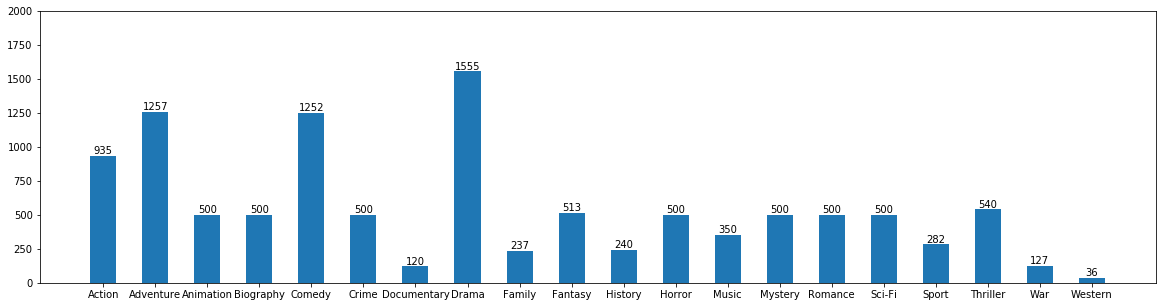

In [17]:
import matplotlib.pyplot as plt

names = list(total.keys())
values = list(total.values())

plt.figure(figsize=(20, 5))
plt.ylim(0, 2000) 
plt.bar(names, values, align='center', width=0.5)

for a,b in zip(names, values):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
    
plt.show()

In [14]:
trainingset.to_csv('./Sample/input_df/trainMatrix.csv', index = 0)
trainingset

,filename,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
6273,littlewoodsfilm_6273.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6274,littlewoodsfilm_6274.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6275,littlewoodsfilm_6275.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6276,littlewoodsfilm_6276.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6277,littlewoodsfilm_6277.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6278,littlewoodsfilm_6278.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6279,littlewoodsfilm_6279.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6280,littlewoodsfilm_6280.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6281,littlewoodsfilm_6281.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6282,littlewoodsfilm_6282.jpg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
testingset.to_csv('./Sample/input_df/testMatrix.csv', index = 0)
testingset

,filename,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
2161,breakthroughmovie_2161.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2163,breakthroughmovie_2163.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2164,breakthroughmovie_2164.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2166,breakthroughmovie_2166.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2167,breakthroughmovie_2167.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2171,breakthroughmovie_2171.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2174,breakthroughmovie_2174.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2177,breakthroughmovie_2177.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2180,breakthroughmovie_2180.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2181,breakthroughmovie_2181.jpg,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
